# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 2nd, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name:

Student ID:

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). Download it using the cell below:

In [60]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 

  Answer: 10
* Determine the median target value. 

  Answer: 140.5
* How many participants have a target value greater than the median target value? 
  
  Answer: 221

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as "diabetes severity below median" or "diabetes severity above median". **[0.5]**

In [61]:
data = dataset.data
df = pd.DataFrame(data, columns=dataset.feature_names)
df['target']=dataset.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [62]:
print('features number:', len(dataset.feature_names))
print('median target value:', df.target.median())
print('number of target value > median target value:', len(df[df.target > df.target.median()]))

features number: 10
median target value: 140.5
number of target value > median target value: 221


In [63]:
target_median = df.target.median()
df['new_target']= np.where(df.target < target_median, 0, 1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,new_target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,1


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [64]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
feature_data = dataset.data
new_target_data = df.new_target.values
x_train, x_test, y_train, y_test = train_test_split(feature_data, new_target_data, test_size=0.3, random_state=0)
x_train

array([[ 0.01264814,  0.05068012,  0.00026092, ...,  0.05608052,
         0.02405258,  0.03205916],
       [-0.02730979, -0.04464164, -0.06656343, ..., -0.03949338,
        -0.03581673, -0.00936191],
       [ 0.00538306, -0.04464164,  0.05954058, ...,  0.05091436,
        -0.00421986, -0.03007245],
       ...,
       [ 0.05987114, -0.04464164, -0.02129532, ...,  0.07120998,
         0.07912108,  0.13561183],
       [-0.07816532, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.01811827, -0.08391984],
       [ 0.04170844,  0.05068012,  0.07139652, ...,  0.03430886,
         0.07341008,  0.08590655]])

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``age``, the y-axis is ``bmi,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




The scales of the x-axis (age) and y-axis (bmi) in the following two figures are different, because through standardization, the data corresponding to the two features of age and bmi have the same scale. The two pictures look similar because we standardized both features at the same time, and the raw data scales of the two features are not much different. The benefit of standardization is to reduce the impact of the data of a certain feature being more dominant in the machine learning process due to its large magnitude.

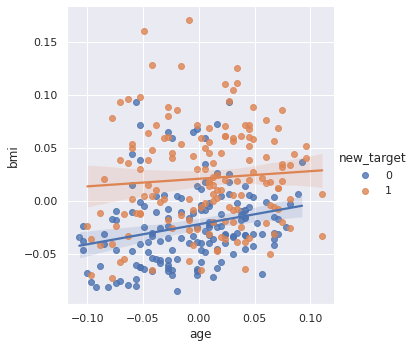

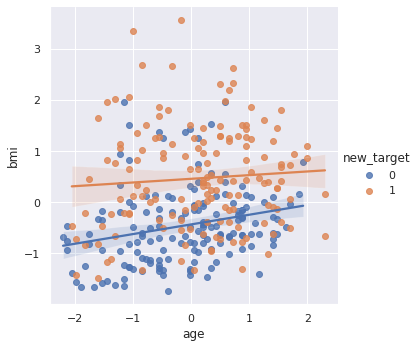

In [65]:
### YOUR CODE HERE ###
import seaborn as sns
sns.set_theme(color_codes=True)
#training set dataframe
df_xy_train = pd.DataFrame(data=x_train, columns=dataset.feature_names)
df_xy_train['new_target']=y_train
#test set dataframe
df_xy_test = pd.DataFrame(data=x_test, columns=dataset.feature_names)
df_xy_test['new_target']=y_test

plot_original = sns.lmplot(x="age", y="bmi", data=df_xy_train, hue="new_target")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_standard = scaler.transform(x_train)
#train set df after standard
df_xy_train_standard = pd.DataFrame(data=x_standard , columns=dataset.feature_names)
df_xy_train_standard['new_target'] = y_train

plot_standard = sns.lmplot(x='age', y='bmi',data=df_xy_train_standard, hue="new_target")





## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a diabetes severity that is less than the median or greater than the median. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**

Answer:

2. The best K is 15, The highest cross-validation accuracy is 75.43%.
3. The overfitted k range is [1,14], and there is no underfitted k range.


In [66]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
train_scores = np.ones(100)
test_scores = np.ones(100)
x_axis = range(1,101)
train_result = np.ones(200).reshape(100,2)
df_train=pd.DataFrame(data=train_result, columns = ["mean_train_accuracy", 
                                                     'mean_validation_accuracy'], index=x_axis)
k=1
while k <= 100:
  knn = neighbors.KNeighborsClassifier(n_neighbors = k )
  scores = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)
  train_scores[k-1] = scores['train_score'].mean()
  test_scores[k-1] = scores['test_score'].mean()
  df_train.at[k, "mean_train_accuracy"]= train_scores[k-1]
  df_train.at[k, "mean_validation_accuracy"]= test_scores[k-1]
  k = k+1
df_train

,mean_train_accuracy,mean_validation_accuracy
1,1.000000,0.660180
2,0.813922,0.611846
3,0.841423,0.689318
4,0.767811,0.656954
5,0.783169,0.689318
...,...,...
96,0.738674,0.721629
97,0.737054,0.734638
98,0.737051,0.728133
99,0.737864,0.731465


In [67]:
best_k = df_train["mean_validation_accuracy"].idxmax()
best_validate_accuracy = df_train.loc[best_k, "mean_validation_accuracy"]
print("best k is:", best_k)
print("highest cross-validation accuracy:", best_validate_accuracy)

best k is: 15
highest cross-validation accuracy: 0.7542570068746695


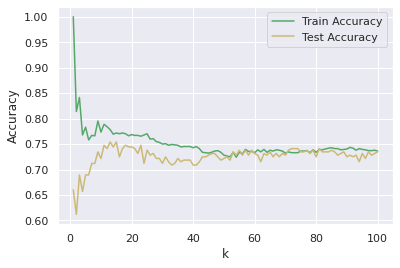

In [68]:
plt.plot(x_axis, train_scores, 'g', label='Train Accuracy')
plt.plot(x_axis, test_scores, 'y', label='Test Accuracy')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

Answer:

**The number of essential features for classification can be 9, because when we remove the feature named s4, the accuracy is higher than the full feature, reaching 76.72%. And 76.72% is the most accurate result among all cross validation results.**

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from matplotlib import pyplot
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
importance = dt.feature_importances_
print(importance)
type(importance)

[0.08794803 0.01849458 0.12301773 0.08551498 0.0669466  0.13936173
 0.1027635  0.0086308  0.29143688 0.07588517]


numpy.ndarray

In [70]:
def Feature_selector (x_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  x_train_fs = x_train.copy()
  original_k=15
  original_cross_validate_accuracy=0.7542570068746695
  #k list 
  best_k_list = []
  best_k_list.append(original_k)
  #accuracy list
  best_mean_cross_validation_list = []
  best_mean_cross_validation_list.append(original_cross_validate_accuracy)
  #feature removed list
  deleted_feature_list = []
  feature_name = dataset.feature_names
  #original set up for loop
  original_feature_num = len(dataset.feature_names)
  feature_num = original_feature_num
  best_validate_accuracy = original_cross_validate_accuracy

  #step 1-2
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(x_train_fs,y_train)
  importance = dt.feature_importances_
  
  #step 3-8
  while (feature_num > 1) and (best_validate_accuracy >= tr*original_cross_validate_accuracy):
    #3 update importance
    min_index = np.argmin(importance)
    importance = np.delete(importance, min_index)
    #update x train set
    x_train_fs = np.delete(x_train_fs, min_index, axis=1)
    #update feature & feature removed list
    deleted_feature = feature_name[min_index]
    deleted_feature_list.append(deleted_feature)
    feature_name = np.delete(feature_name, min_index)
    feature_num = len(feature_name)
    #4 knn model
    best_k, best_validate_accuracy = KNN_find_best(x_train_fs, y_train)
    #5 update k list & accuracy list
    best_k_list.append(best_k)
    best_mean_cross_validation_list.append(best_validate_accuracy)

  return best_k_list, best_mean_cross_validation_list, deleted_feature_list


def KNN_find_best (x_train, y_train):
  train_scores = np.ones(100)
  test_scores = np.ones(100)
  x_axis = range(1,101)
  train_result = np.ones(200).reshape(100,2)
  df_train=pd.DataFrame(data=train_result, columns = ["mean_train_accuracy", 
                                                     'mean_validation_accuracy'], index=x_axis)
  k=1
  while k <= 100:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k )
    scores = cross_validate(knn, x_train, y_train, cv=5, return_train_score=True)
    train_scores[k-1] = scores['train_score'].mean()
    test_scores[k-1] = scores['test_score'].mean()
    df_train.at[k, "mean_train_accuracy"]= train_scores[k-1]
    df_train.at[k, "mean_validation_accuracy"]= test_scores[k-1]
    k = k+1
  best_k = df_train["mean_validation_accuracy"].idxmax()
  best_validate_accuracy = df_train.loc[best_k, "mean_validation_accuracy"]
  
  return best_k, best_validate_accuracy




In [71]:
best_k, best_mean_cross_validation_list, deleted_feature_list = Feature_selector(x_train , y_train , tr=0.95)
print("best k list:", best_k) 
print("best cv list:", best_mean_cross_validation_list)     
print("deleted feature list:",  deleted_feature_list)   


best k list: [15, 25, 91, 99, 73, 7, 19, 60, 82, 85]
best cv list: [0.7542570068746695, 0.7671602326811211, 0.7539925965097833, 0.7540983606557378, 0.7574299312533052, 0.7540454785827604, 0.7637757800105763, 0.7540983606557378, 0.7248545742993127, 0.7248016922263353]
deleted feature list: ['s4', 'sex', 's1', 's6', 'bp', 'age', 's3', 'bmi', 's2']


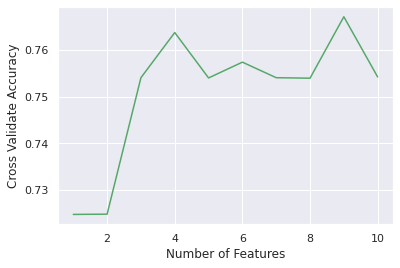

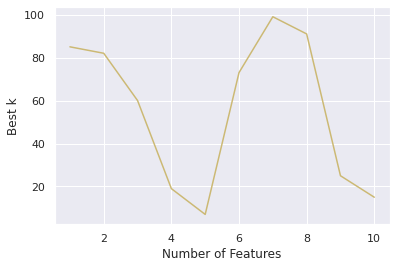

In [72]:
axis = range(1,11)
best_k_list_re = best_k[::-1]  
best_mean_cross_validation_list_re = best_mean_cross_validation_list[::-1]

plt.plot(axis, best_mean_cross_validation_list_re, 'g', label='Cross Validation Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validate Accuracy')
plt.show()

plt.plot(axis, best_k_list_re, 'y', label='Best K')
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.show()

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance? 


Answer:

In this case, standardization did not significantly improve the accuracy of the model. After removing the feature named "s4", the accuracy of the 9 features is still the highest, at 76.38%, but it is slightly lower than the Cross Validation Accuracy 76.72% using the original data. But a slight change in accuracy will not affect our choice, we can still use the other 9 features after excluding ''s4'' for machine learning, because this is still the most accurate result. It is worth noting that after standardization, if the four features "s4", "sex", "s1", and "s6" are removed, the accuracy corresponding to the remaining 6 features increases from 75.41% to 76.38%. . Similar accuracies were obtained using either 6 or 9 features. After standardization, we can also choose 6 features if we want.

In general, the data scale of different features in the original data will not have a great impact on the accuracy of machine learning, and the accuracy of using the original data is even higher.

best k list sd: [15, 15, 90, 24, 77, 7, 41, 60, 28, 85]
best cv list sd: [0.7542570068746695, 0.7638286620835537, 0.7539925965097832, 0.7573241671073507, 0.7638286620835537, 0.7540454785827604, 0.7605499735589636, 0.7540983606557378, 0.7281332628239026, 0.7248016922263353]
deleted feature list sd: ['s4', 'sex', 's1', 's6', 'bp', 'age', 's3', 'bmi', 's2']


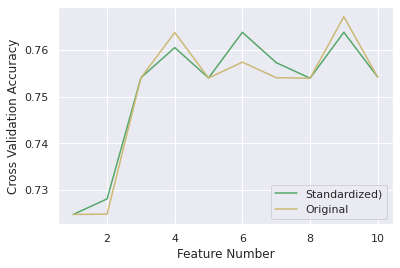

In [73]:
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
#standardize train set & test set
train_scaler = StandardScaler()
x_train_scaled = train_scaler.fit_transform(x_train)
x_test_scaled = train_scaler.fit_transform(x_test)

#plot
best_k_sd, best_mean_cross_validation_list_sd, deleted_feature_list_sd = Feature_selector(x_train_scaled , y_train , tr=0.95)
print("best k list sd:", best_k_sd) 
print("best cv list sd:", best_mean_cross_validation_list_sd)     
print("deleted feature list sd:",  deleted_feature_list_sd)
axis = range(1,11)  
best_mean_cross_validation_list_sd_re = best_mean_cross_validation_list_sd[::-1]

plt.plot(axis, best_mean_cross_validation_list_sd_re, 'g', label='Standardized)')
plt.plot(axis, best_mean_cross_validation_list_re, 'y', label='Original')
plt.legend()
plt.xlabel('Feature Number')
plt.ylabel('Cross Validation Accuracy')
plt.show()                        



## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


Answer:

Under the condition of using all features, the optimal setting of Decision Tree is depth=2, min samples split=2, which will obtain the highest accuracy of 73.13%. If a standardized dataset is used, the KNN model achieves a maximum accuracy of 75.42% at k=13. If the original dataset is used, the KNN model achieves a maximum accuracy of 75.43% at k=15.

Overall, the KNN model achieves higher accuracy than the Decision Tree model.

In [74]:
### YOUR CODE HERE ###
all_scores = []
for depth in range(1, 20):
    scores_list = []
    for split in range(2, 20):
        dt = DecisionTreeClassifier(splitter='best', max_depth=depth, min_samples_split=split, random_state=0)
        scores = cross_validate(dt, x_train_scaled, y_train, cv=5, return_train_score=True)
        scores_list.append(scores['test_score'].mean())
    all_scores.append(scores_list)

all_scores = np.array(all_scores)
highest_score_index = np.unravel_index(np.argmax(all_scores), all_scores.shape)
best_depth, best_split = highest_score_index[0] + 1, highest_score_index[1] + 2
highest_score = all_scores[highest_score_index]

print("Max Accuracy of Decision Tree = ", highest_score)
print("Best Depth = ", best_depth)
print("Min Samples Split = ", best_split)


Max Accuracy of Decision Tree =  0.7313061872025385
Best Depth =  2
Min Samples Split =  2


In [75]:
KNN_best_k_scaled, KNN_best_validate_scaled = KNN_find_best (x_train_scaled, y_train)
print("KNN best k with standardized dataset:", KNN_best_k_scaled)
print("KNN Accuracy with standardized dataset:", KNN_best_validate_scaled)

KNN best k with standardized dataset: 13
KNN Accuracy with standardized dataset: 0.754151242728715


In [76]:
KNN_best_k, KNN_best_validate = KNN_find_best (x_train, y_train)
print("KNN best k with original dataset:", KNN_best_k)
print("KNN Accuracy with original dataset:", KNN_best_validate)

KNN best k with original dataset: 15
KNN Accuracy with original dataset: 0.7542570068746695


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Answer:

After removing feature "s4", use 9 features unstandardized dataset in KNN model with k=25 will get the highest accuracy. After testing the model using the test set with the feature “s4” deleted, we obtained a prediction accuracy of 79.7% for the KNN model testing.

In [77]:
### YOUR CODE HERE ###
#Use 9 features unstandardized dataset in KNN model with K=25
from sklearn.metrics import accuracy_score
df_x_train=pd.DataFrame(data=x_train, columns=dataset.feature_names)
df_x_train_9 =df_x_train.drop("s4", axis=1)

df_x_test=pd.DataFrame(data=x_test, columns=dataset.feature_names)
df_x_test_9 =df_x_test.drop("s4", axis=1)

knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn = knn.fit(df_x_train_9, y_train)

y_pred = knn.predict(df_x_test_9)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", accuracy)

Accuracy =  0.7969924812030075


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/